In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
training_images, testing_images = training_images / 255, testing_images / 255

In [4]:
class_names = ['plane','car','bird','cat','Deer','Dog','frog','Horse','Ship','Truck']

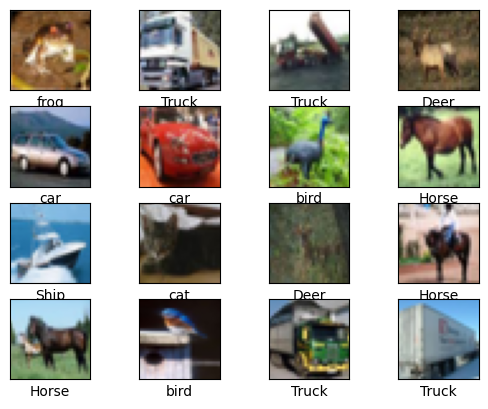

In [6]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [7]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 [==============================] - 7s 5ms/step - loss: 1.7382 - accuracy: 0.3597 - val_loss: 1.5846 - val_accuracy: 0.4185
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.3614 - accuracy: 0.5131 - val_loss: 1.2988 - val_accuracy: 0.5368
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 1.2025 - accuracy: 0.5736 - val_loss: 1.2317 - val_accuracy: 0.5555
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 1.0862 - accuracy: 0.6169 - val_loss: 1.1117 - val_accuracy: 0.5980
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.9916 - accuracy: 0.6513 - val_loss: 1.0837 - val_accuracy: 0.6208
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.9070 - accuracy: 0.6839 - val_loss: 1.0341 - val_accuracy: 0.6472
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.8336 - accuracy: 0.7078 - val_loss: 1.0334 - val_accuracy: 0.6398
Epoch 

In [14]:
loss, accuracy = model.evaluate(testing_images, testing_labels)

125/125 [==============================] - 0s 4ms/step - loss: 1.0553 - accuracy: 0.6557


In [15]:
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Loss: 1.0552994012832642
Accuracy: 0.6557499766349792


In [16]:
model.save('image_classifier.model')

In [41]:
model = models.load_model('image_classifier.model')

In [42]:
img = cv.imread('Horse.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

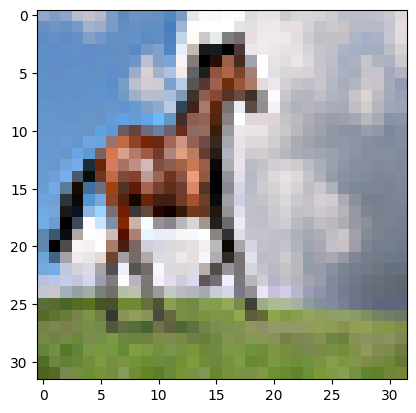

In [43]:
plt.imshow(img, cmap=plt.cm.binary)

In [44]:
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 434ms/step
Prediction is Horse


1/1 [==============================] - 0s 36ms/step
Prediction is Deer


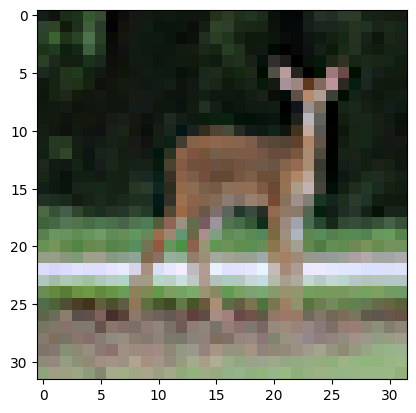

In [45]:
img = cv.imread('Deer.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 17ms/step
Prediction is car


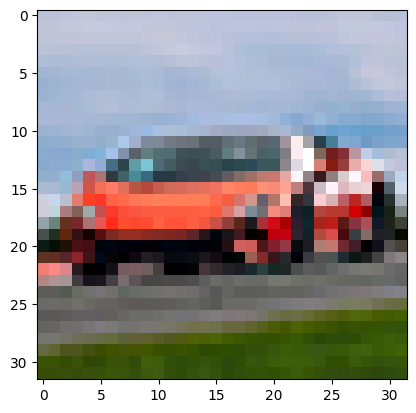

In [46]:
img = cv.imread('Car.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 71ms/step
Prediction is plane


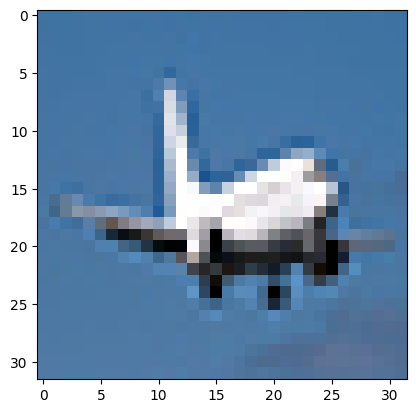

In [47]:
img = cv.imread('Plane.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')